# Rimless Wheel dynamics

In [1]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()

  Activating new project at `~/syndr/Wouter/Onderzoek/Projecten/tue/compasswalker/actinf-compasswalker`
  No Changes to `~/syndr/Wouter/Onderzoek/Projecten/tue/compasswalker/actinf-compasswalker/Project.toml`
  No Changes to `~/syndr/Wouter/Onderzoek/Projecten/tue/compasswalker/actinf-compasswalker/Manifest.toml`


In [34]:
using Base64
using LinearAlgebra
using Distributions
using CairoMakie

In [102]:
# Frames per second
fps = 30

30

In [35]:
function display_mp4(filename)
    display("text/html", string("""<video autoplay controls><source src="data:video/x-m4v;base64,""",
    base64encode(open(read,filename)),"""" type="video/mp4"></video>"""))
end

display_mp4 (generic function with 1 method)

## System

![](figures/rimlessWheel.svg)

In [29]:
m = 1.0
ℓ = 0.2
γ = 0.5 # 0 < γ < 2π
α = π/6
const g = 9.81

9.81

## Start from stance

In [24]:
function animwheel(θt::Vector{Float64}, contact::Vector{Float64})

    f = Figure(resolution=(800,700))
    ax = Axis(f[1, 1])

    # Angle
    θk = Observable(0.0)

    # Slope
    poly!(ax, Point2f[(0, 0), (1, 0), (0, tan(γ))])
    CairoMakie.ylims!(ax, [0.,1.])

    # Standing spoke
    xk = @lift([contact[1], contact[1] + ℓ*sin($θk)])
    yk = @lift([contact[2], contact[2] + ℓ*cos($θk)])
    lines!(xk, yk, linewidth=5, color=:black)

    # Center hub
    centerx = @lift([contact[1]+ℓ/2*sin($θk)])
    centery = @lift([contact[2]+ℓ/2*cos($θk)])
    CairoMakie.scatter!(centerx, centery, marker=:circle, markersize=20, color=:black)

    # All spokes
    for n in 0:5
        xk = @lift([contact[1]+ℓ/2*sin($θk), contact[1]+ℓ/2*sin($θk)+ℓ/2*sin($θk+n*2α)])
        yk = @lift([contact[2]+ℓ/2*cos($θk), contact[2]+ℓ/2*cos($θk)+ℓ/2*cos($θk+n*2α)])
        lines!(xk, yk, linewidth=5, color=:black)
    end

    # Write animation
    record(f, "rimless-wheel.mp4", θt; framerate = 30) do θ
        θk[] = θ
    end
end

animwheel (generic function with 2 methods)

In [25]:
Δt = 0.01
time = range(0, stop=3.0, step=Δt)
T = length(time)

301

In [62]:
function eom(z,t)
    return [z[1] + Δt*z[2]; z[2] + Δt*(g/ℓ*sin(z[1]))]
end

eom (generic function with 1 method)

In [63]:
# Preallocate
z_ = zeros(2,T)

# Initial condition
z_0 = [0.0, 1.0]
z_kmin1 = z_0

for (n,t) in enumerate(time)
    
    # Forward simulation
    z_[:,n] = eom(z_kmin1, t)
    z_kmin1 = z_[:,n]
    
end

animwheel(z_[1,:], [0, tan(γ)])

"rimless-wheel.mp4"

In [64]:
display_mp4("rimless-wheel.mp4")

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQADwP9tZGF0AAACoQYF//+d3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyAtIEguMjY0L01QRUctNCBBVkMgY29kZWMgLSBDb3B5bGVmdCAyMDAzLTIwMjEgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwgLSBvcHRpb25zOiBjYWJhYz0xIHJlZj01IGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMgbWU9aGV4IHN1Ym1lPTggcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTIgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xOCBsb29rYWhlYWRfdGhyZWFkcz0zIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0zIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xvb2thaGVhZD01MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIwLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAABgmZYiEADf//veBvzLLXx576uAt6KuEAti0w3Gz3Rq4DVs66B4H0KbCYMxXoBU/YYQI7bQsq5E8NlkGHdq3m8sIyPsCWxFVN03xbG1kh3bRRklrS2QKNmKPVmQBP4elmNcZAcUOTB2CaCkbiR+CBpw+v0IQrkWboC0ilBPceDrcc7mFrx9JK4WZ5FtzhsSPAgAAAwAAAwAAAwADn7+ChhUuFVxn4xA3FmNGOqhqr+RQv7sSJkID98BylZ9Q5IHnbfI65WN9gTF4TYH+30PbuOqlR3WDKpiuWungK+zS1htHBdDy++r/OkBpBu5Bm6beXjUBgouwUSuYXYU5XNctgkHrOhv56KisYMEy+vc49SSSx4FEkta0wdjRi7i1cWDAUlNH9oP18P8Cd3XksKhIjzSjs6+ORgbb05WmtO0RDfnyRRLJZiga7JgD12jaIJ3M4dQqzfTVcHzzinlN2GpaHR2REoRNiLSupHGcQH/ArqvY8LGoWV33fK6bKWYb9qbAAA1J/DcO/CFiQAHbWJq3hHgABBCIjC0nCjq73wD1aIyg2YNtGvZ2vSCaCIi4XYQLR9Y+d1NT3FO/cDvxJOavq///fUkhtQOCgXiwFyEyAb1cUeQE2ry1HzMvO6/ZMhClg0m631CzREVPsAAAAwN34r9Sf0jLGhpJk1pCNw3srEwgErQxH5sWodtUXcWgknWJnM6AYW3mXU8vBveEpegIk4jqCuQ6xGbbeZuYUUfPB19UMDfre/qain01w6e5j6ZRe4q/HauwBfnMmjE24ybat7N+0iUtI9mM3mvRTB7Aqftl+pGJsXr5l+dAs6+Ax0FM9ISUR6WgrnwDy1PorSjIYyNS+9y03uIYPHYT2upF3RPVv4VnR2bJwKbux40j6DUadKkmSo804KL3bFIsfZyQydzTHLlR1/UTDJXU4sjW67bD2uJC4NX0gg2Zs647IPA/1VCwpCftdoVGDxjB0GjSb9nB2Dgmob0FjB1OhENqFbegjCnmO8z16becGAhgAC05xsq1SpFL1FgEQduNaPm7L59AFCbEf0nN9R+avRDaPNoP+VcKHZJ/aw/YHuiLvo4Z03KUpsSIXUdUOvw9VafzPVdipY1TI+QYjcBpRj5lVY/Qsi1RBfUejT3sx5H/m2YQUAGIBOUUtMNPKPhtn5j//H/9rtm39LEEeAVQPHuXhFmJQEK3wdziM9KOo+kz5m5Qr4APZ8fFTLfpigGH6E+nWGqVtbrFy1QsG0Vi9pUh2y7YoYNGq/M7Sa8deZxL5D2CaTj9eO410XFhD6xwXAwDlQYnyFgf5/rxIm++6wBTABIWS/Vz19DQgHB67QzjYaLJH+a8M3Leoln7X8KVGRplrYnMFMaIJp7ZO11zbsZjMASQqmRq7/xsELJIgdh30TsZWRa8T/lE91DdjJz+q8TfoNL4yDTGN3bA3c0xc7q+wGj+pFDu/tCFz3IJozfIKjgW5RlrJGamNdW4D98KFyrF98NOB8AeTdVgNz1yXUlTnEeYuKYV971c3nizBmebZdG9qEpkjziaX1nCwvzlu6FvUQEXCLGfGa5sbrn1cu5j0fPT8byGgQ/VKtd4DS6cF5D1SetfFcEDr6nofocwADhWp8FaKHaVg6hbq+KOfH7KZcxIBP4agdFgc4i/nvw/zXOGW1VHHlhFNO+RSg3B9lu4C5xkF8Lpqu/MiH7NgfJhMIL9IofWUDTsHJSmGDadHCsAdWJM7Nhz0xcj+4MGMIiU14zGDAOWLtQHni9X8mevvi8hvINQou0Beu2HyDA3/fjJfF5c1u3yd8qDJzKn7eUPdiYZZrH8VIQBgjBFgSrScUwCQtoceiyFprwfBnSOiDetO3RuDzkxNnE4R17IQDG9DtuZ4sCIqw5YzHXnX7ceVHYUE2sV5sHIHXjdcw+crcjkopYDweSMV6/m6DhmpPD+5CddQfTX+V5GratGHoJ/X3j8QUC85APNoWznXJQy5GqcvBEr504TzcVB3XZ31CkL34QqtMdxB/O5yxwQrfAGIn/h0GATwiTr8zSAKv9KulDnsVCmlY27L+HK1y4mb0wcAqzUVRmqmcU4gQIxAd3PeMEHVJDk/hMnXBGYtUaYVDc2SV4Uidkno0IZUgqnBFVCRvhdsGmcp6ZALAjMktlYywDs4HSopvxDUPLLO/+YEjBXq031HGWXQNZs6AU0M8PSZrfgY8Dg3HIMst0Kv+AAN8bEXkSehhngVvqKFg2bTW5aOvfXwtGy75phimACaBy4pKZi1aHope55JkNKP6i2d1Jh5l0Sebhs4DfxasH98JYmxRT8+QPduMXzuHZQN4zARdq5RRNrwkuldmnfbA6t3yUdmBz67vubPlhM3r5s1ro1YsCDjefGswV6OTKEpepJEN90GK723CHYYzmooh6vGE3903CwpdxddixppIJs8EbY8IMac5oolaPxm/hhbuiMwcgE0gVAuU4qzaIeHrBZIjyhtEGCx8bdRO0wG/xhJWBc5+d7JEcmqPAE3VRDqrRF77KD6/dErM1psC5Om6lnWpSlvMr0dhb0v65n6jIsUj2Dqi1zY4QX2h/Kw5WuJhD0Sj8hrY9mPzl9NhWOyjN/NGjnD7rgb9UJqZbR9tmgXHoYdCWhGApGDsRfg9R53T5NUR2A6P5/3C0UkTC7so9ZpJwTpCUjByqzOiSa0HgBFnLispMKlRHXCMbhIbEwDluSalPAGhv1GRXddIgwCPrDeRuoKRxI93UeD0EVKowl7lwAo7HFtgIekiUy9SeiGA0wS8yN5XtstMZcfZpHdQXVoXzbbQDBaz0UjlqDnHrB5ggzMgvFCnGJBbROnvn/m50ykCEazit4cBBk9MX81ux1Hf4psfkNb19cS3z2BD1ifcaOKFETYoF9XICqABMIxstqjsWJZ6aiCoh/bUuUShOHgSHdLdFwh8TgguyhjOY/S8E7kAJDXqOQ2Bsla90S7tDDePCpdMBvNyG5npZlp99x3LgYXsMGFoQ

## Foot collision

A collision occurs when $\theta = \gamma \pm \alpha$.

In [123]:
function collision_detection(θ; α=0.0, γ=0.0)
    return norm(θ - γ+α) < 1e-2
end

collision_detection (generic function with 1 method)

Geometry of contact point. Base of rimless wheel triangle is $2 l \sin(2\alpha)$. Original length of incline is $\cos(\gamma) l = 1 \implies l = \cos(\gamma)^{-1})$. Minus base of rimless wheel is $l_{new} = \cos(\gamma)^{-1}) - 2 l \sin(2\alpha)$. New x-coordinate of contact point = $l_{new} \cos(\gamma)$ and new y-coordinate of contact point = $l_{new} \sin(\gamma)$.

In [124]:
function upcontact!(contact; α=0.0, γ=0.0)
    l_old = sqrt(1 + contact[2]^2)
    l_new = 1 ./cos(γ) - 2*l_old*sin(2α)
    contact = [l_new*cos(γ), l_new*sin(γ)]
end

upcontact! (generic function with 1 method)

In [125]:
f = Figure(resolution=(800,700))
ax = Axis(f[1, 1])

# Angle
θk = Observable(0.0)
cx = Observable(0.0)
cy = Observable(tan(γ))

# Slope
poly!(ax, Point2f[(0, 0), (1, 0), (0, tan(γ))])
CairoMakie.ylims!(ax, [0.,1.])

# Standing spoke
xk = @lift([$cx, $cx + ℓ*sin($θk)])
yk = @lift([$cy, $cy + ℓ*cos($θk)])
lines!(xk, yk, linewidth=5, color=:black)

# Center hub
centerx = @lift([$cx+ℓ/2*sin($θk)])
centery = @lift([$cy+ℓ/2*cos($θk)])
CairoMakie.scatter!(centerx, centery, marker=:circle, markersize=20, color=:black)

# All spokes
for n in 0:5
    xk = @lift([$cx+ℓ/2*sin($θk), $cx+ℓ/2*sin($θk)+ℓ/2*sin($θk+n*2α)])
    yk = @lift([$cy+ℓ/2*cos($θk), $cy+ℓ/2*cos($θk)+ℓ/2*cos($θk+n*2α)])
    lines!(xk, yk, linewidth=5, color=:black)
end

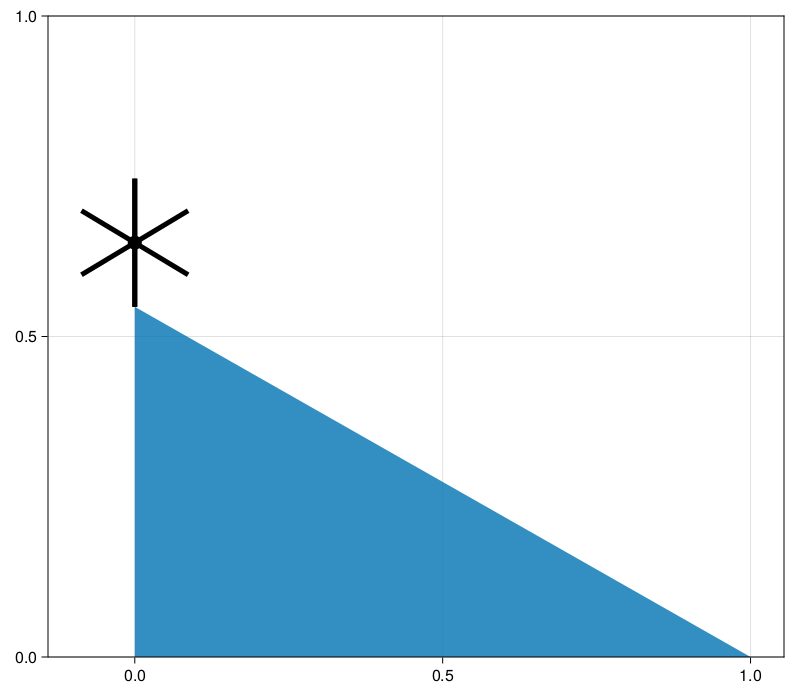

In [126]:
f

In [ ]:
# Preallocate
z_ = zeros(2,T)
contact = [0,tan(γ)]

# Initial condition
z_0 = [0.0, 1.0]
z_[:,1] = z_0

record(f, "rimless-wheel+collision.mp4", 2:T; framerate=fps) do k
    
    # Forward simulation
    z_[:,k] = dzdt(z_[:,k-1], time[k])
    
    θk[] = z_[1,k]

    # Collision detection
    if collision_detection(z_[1,k], α=α, γ=γ)
        
        # Process shock (velocity lost)
        z_[1,k] = -z_[1,k]
        z_[2,k] *= cos(2α)
    
        # Adjust contact point
        upcontact!(contact, α=α, γ=γ)
        
        cx[] = contact[1]
        cy[] = contact[2]
    end       
    sleep(1/fps)
end

In [ ]:
display_mp4("rimless-wheel+collision.mp4")